In [1]:
import pandas as pd
import matplotlib
import seaborn
import pysam
import numpy as np

from collections import Counter, defaultdict
import glob
%matplotlib inline

In [7]:
cov_df = pd.read_table("lmo_2012_data/120322_coverage.tsv.gz")

In [8]:
cov_df.columns

Index(['contig', 'length', 'cov_mean_sample_120314', 'cov_mean_sample_120322',
       'cov_mean_sample_120328', 'cov_mean_sample_120403',
       'cov_mean_sample_120416', 'cov_mean_sample_120419',
       'cov_mean_sample_120423', 'cov_mean_sample_120507',
       'cov_mean_sample_120516', 'cov_mean_sample_120521',
       'cov_mean_sample_120531', 'cov_mean_sample_120604',
       'cov_mean_sample_120613', 'cov_mean_sample_120619',
       'cov_mean_sample_120628', 'cov_mean_sample_120705',
       'cov_mean_sample_120709', 'cov_mean_sample_120717',
       'cov_mean_sample_120802', 'cov_mean_sample_120806',
       'cov_mean_sample_120813', 'cov_mean_sample_120820',
       'cov_mean_sample_120823', 'cov_mean_sample_120828',
       'cov_mean_sample_120903', 'cov_mean_sample_120910',
       'cov_mean_sample_120920', 'cov_mean_sample_120924',
       'cov_mean_sample_121001', 'cov_mean_sample_121004',
       'cov_mean_sample_121015', 'cov_mean_sample_121022',
       'cov_mean_sample_121028', 'co

In [9]:
cov_df[['cov_mean_sample_120314', 'cov_mean_sample_120322', 'cov_mean_sample_120328','contig', 'length']].describe()

,cov_mean_sample_120314,cov_mean_sample_120322,cov_mean_sample_120328,length
count,252295.000000,252295.000000,252295.000000,252295.000000
mean,0.709398,8.630284,0.813455,461.292824
std,4.985851,19.310608,7.341121,871.958068
min,0.000000,0.000000,0.000000,100.000000
25%,0.000000,3.988093,0.000000,186.000000
50%,0.000000,5.452051,0.367273,260.000000
75%,0.848739,7.849452,1.080214,430.000000
max,1779.055558,1839.693151,2761.055485,19986.000000


In [44]:
long_cov_df = cov_df[cov_df['length'] > 1000]

In [45]:
clustering_df = pd.read_table("lmo_2012_data/clustering_gt1000.csv", sep=',', names=['contig_id','cluster_id'], index_col=0)

In [46]:
cov_df[cov_df['contig'] == 'contig18126']

,contig,length,cov_mean_sample_120314,cov_mean_sample_120322,cov_mean_sample_120328,cov_mean_sample_120403,cov_mean_sample_120416,cov_mean_sample_120419,cov_mean_sample_120423,cov_mean_sample_120507,...,cov_mean_sample_120924,cov_mean_sample_121001,cov_mean_sample_121004,cov_mean_sample_121015,cov_mean_sample_121022,cov_mean_sample_121028,cov_mean_sample_121105,cov_mean_sample_121123,cov_mean_sample_121128,cov_mean_sample_121220
2570,contig18126,1000,0.0,6.567,0.0,0.101,0.101,0.888,0.404,4.006,...,3.951,6.048,1.682,2.669,1.164,0.404,1.114,0.383,2.063,1.201


In [47]:
clustering_d = clustering_df.to_dict()["cluster_id"]

In [49]:
long_cov_df['cluster_id'] = long_cov_df['contig'].apply(lambda x: clustering_d[x])

/Users/johannesalneberg/anaconda/envs/concoct_estimate_from_contigs/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
long_cov_df[['cov_mean_sample_120314', 'cov_mean_sample_120322', 'cov_mean_sample_120328','contig', 'length']].describe()

,cov_mean_sample_120314,cov_mean_sample_120322,cov_mean_sample_120328,length
count,18372.000000,18372.000000,18372.000000,18372.000000
mean,1.627048,21.859251,1.546958,2403.242216
std,4.707123,35.142228,2.205880,2439.266384
min,0.000000,4.266929,0.000000,1000.000000
25%,0.202436,9.735499,0.457311,1197.000000
50%,0.813558,12.198102,1.017213,1538.000000
75%,1.953648,18.003551,2.021270,2379.000000
max,262.955014,851.465538,89.918479,19986.000000


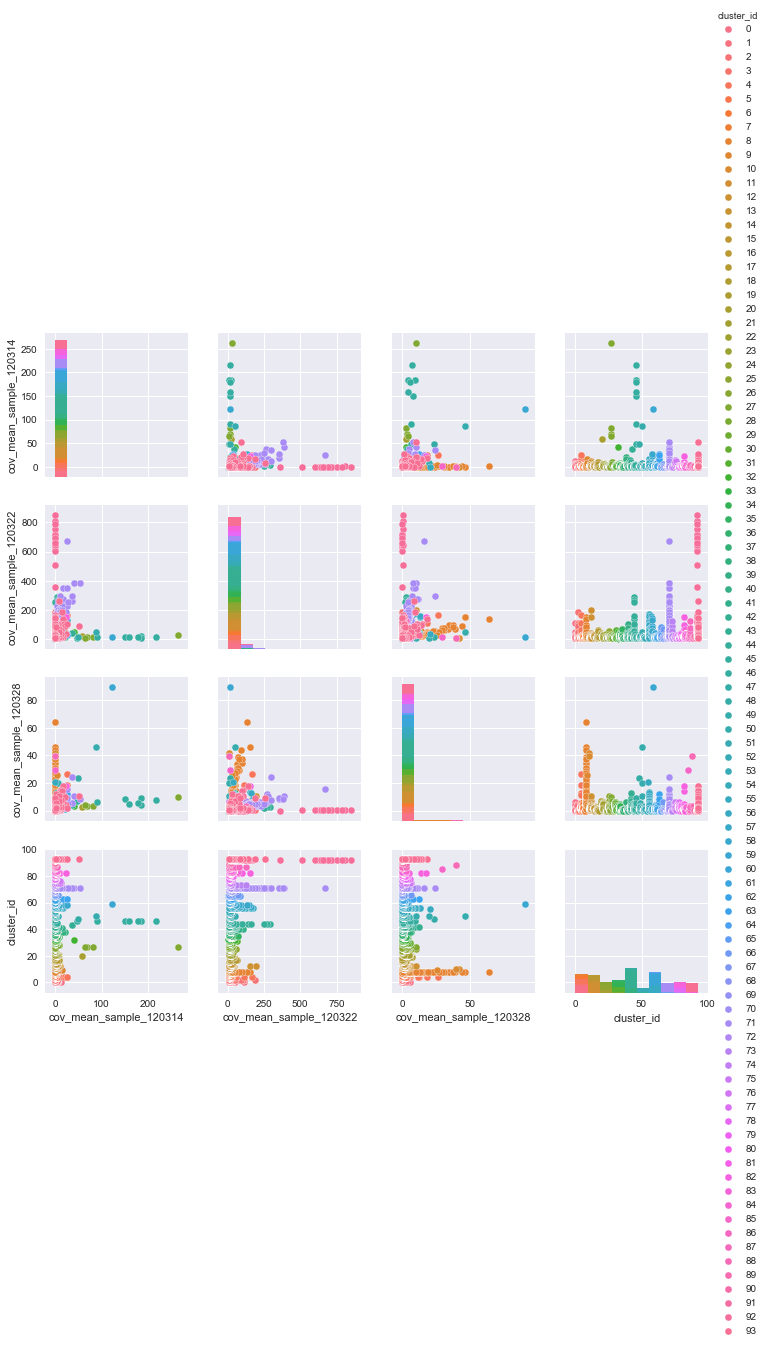

In [50]:
seaborn.pairplot(long_cov_df[['cov_mean_sample_120314', 'cov_mean_sample_120322', 'cov_mean_sample_120328', 'cluster_id']], hue='cluster_id')

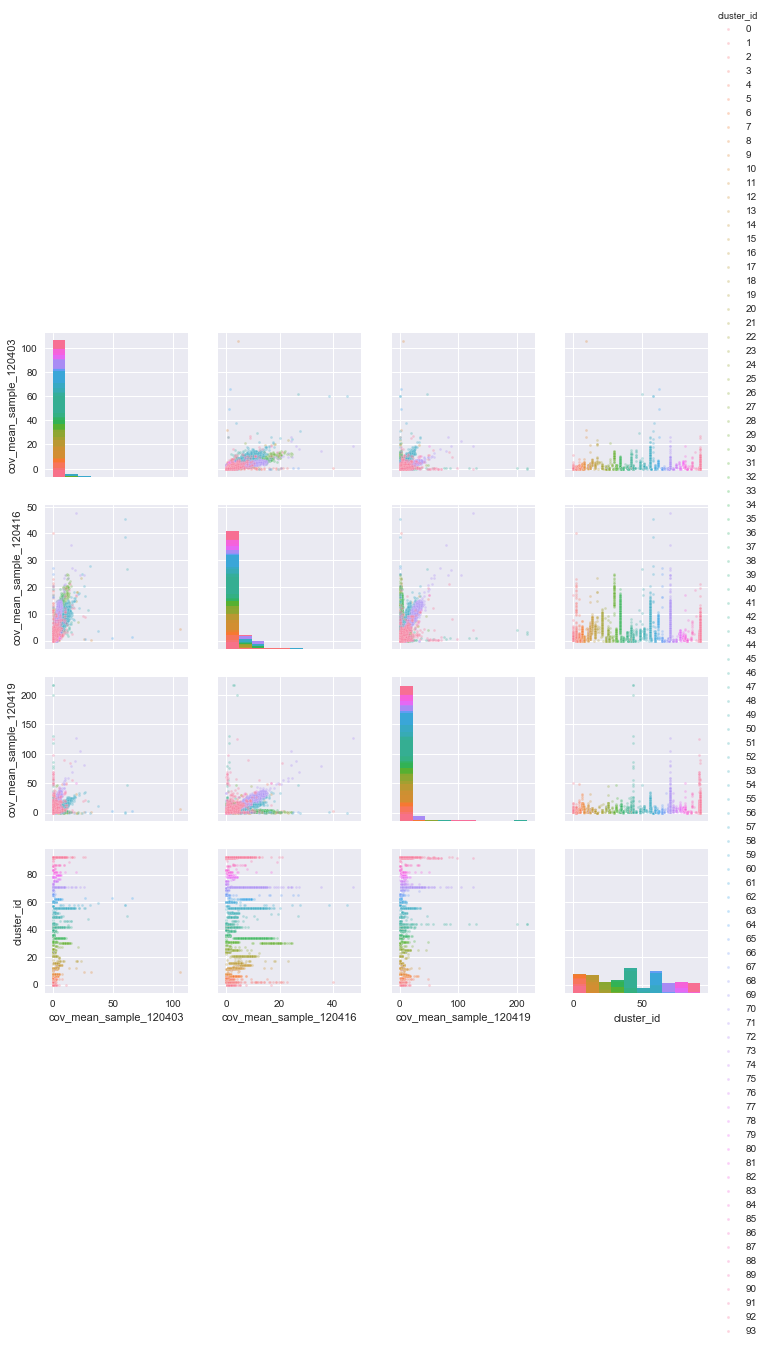

In [52]:
seaborn.pairplot(long_cov_df[['cov_mean_sample_120403', 'cov_mean_sample_120416', 'cov_mean_sample_120419', 'cluster_id']], hue='cluster_id', plot_kws={'s': 8.0, "alpha":0.3})

In [28]:
sample_norm_df = long_cov_df.ix[:,'cov_mean_sample_120314':'cov_mean_sample_120419'].divide(long_cov_df.ix[:,'cov_mean_sample_120314':'cov_mean_sample_120419'].sum(axis=0),axis=1)

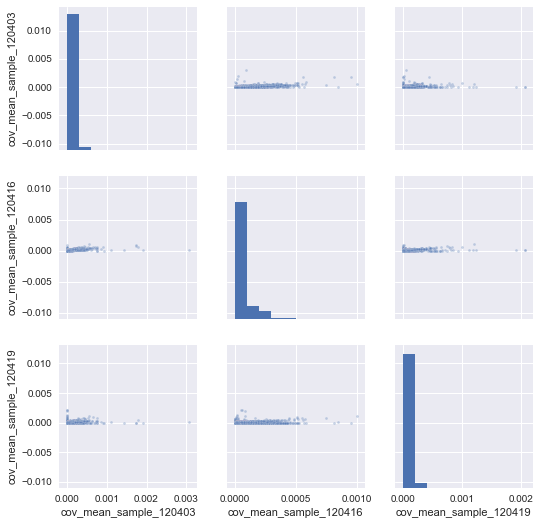

In [29]:
seaborn.pairplot(sample_norm_df[['cov_mean_sample_120403', 'cov_mean_sample_120416', 'cov_mean_sample_120419']], plot_kws={'s': 8.0, "alpha":0.3})

In [30]:
sample_and_contig_norm_df = sample_norm_df.ix[:,'cov_mean_sample_120314':'cov_mean_sample_120419'].divide(sample_norm_df.ix[:,'cov_mean_sample_120314':'cov_mean_sample_120419'].sum(axis=1),axis=0)


In [53]:
sample_and_contig_norm_df['cluster_id'] = long_cov_df['cluster_id']

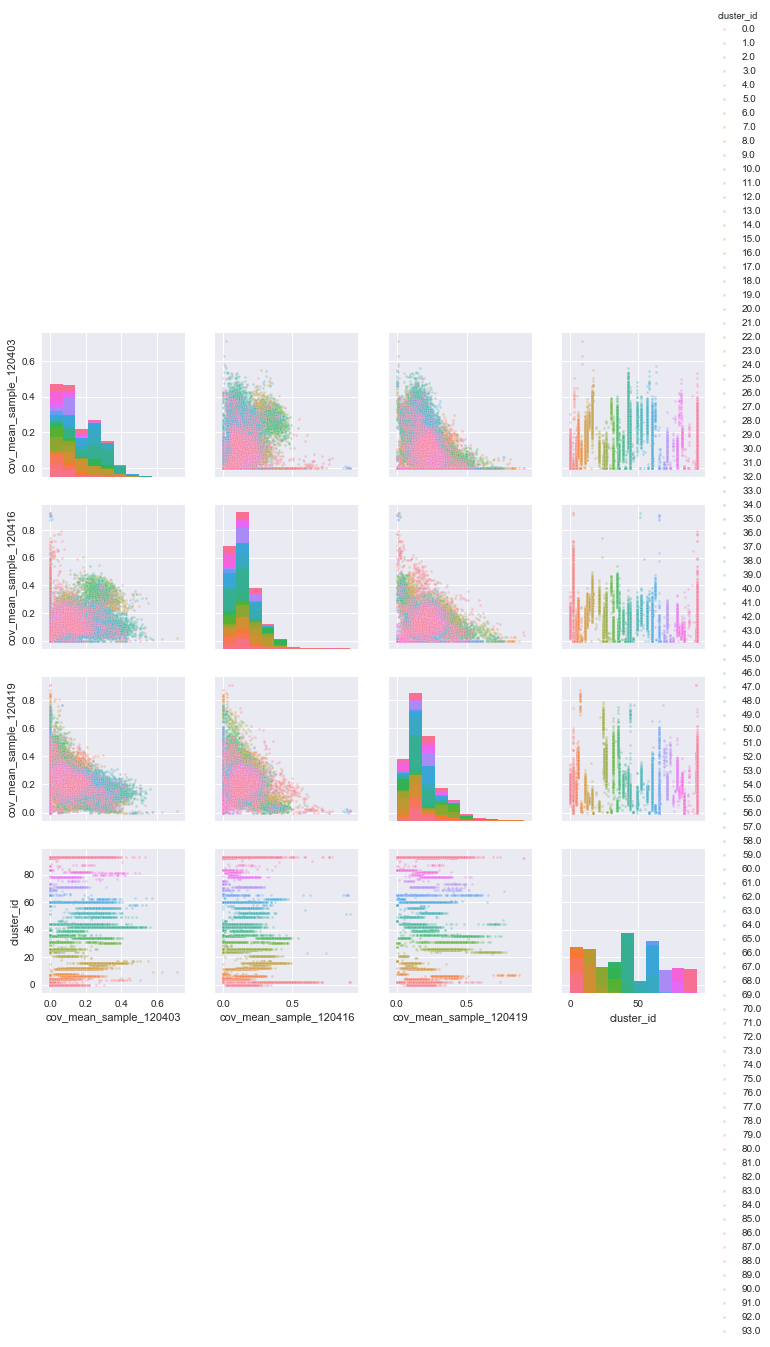

In [54]:
seaborn.pairplot(sample_and_contig_norm_df[['cov_mean_sample_120403', 'cov_mean_sample_120416', 'cov_mean_sample_120419', 'cluster_id']], hue='cluster_id', plot_kws={'s': 8.0, "alpha":0.3})

In [58]:
all_mags = [74.0, 51.0, 79.0, 65.0]

In [60]:
mag_norm_df = sample_and_contig_norm_df[sample_and_contig_norm_df['cluster_id'].isin(all_mags)]

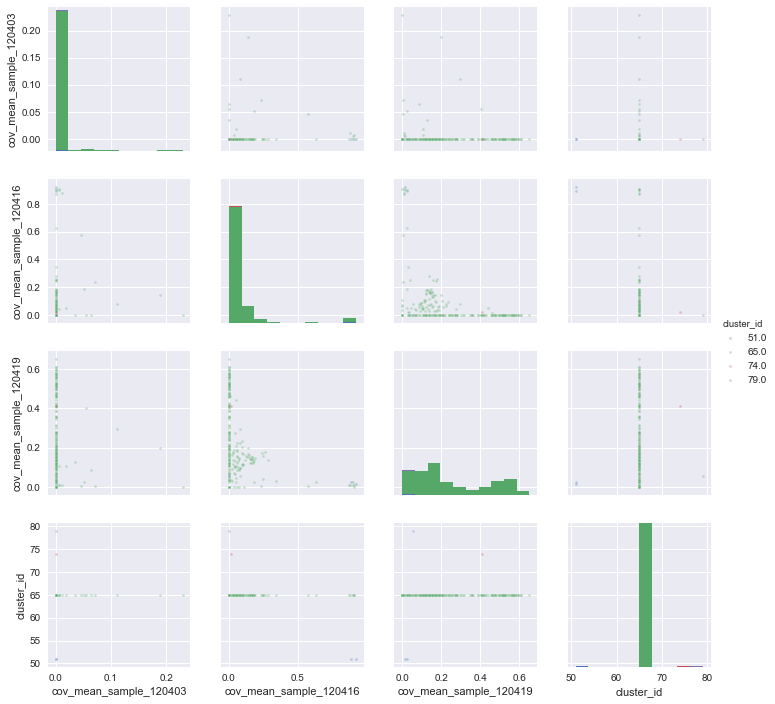

In [61]:
seaborn.pairplot(mag_norm_df[['cov_mean_sample_120403', 'cov_mean_sample_120416', 'cov_mean_sample_120419', 'cluster_id']], hue='cluster_id', plot_kws={'s': 8.0, "alpha":0.3})

In [62]:
for cluster_id, cluster_df in mag_norm_df.groupby('cluster_id'):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-62-ed42cf91e233>, line 2)